In [2]:
import pandas as pd 

In [3]:
import numpy as np

In [4]:
import matplotlib.pyplot as plt

In [5]:
computer = pd.read_csv("C:/Users/elcot/Downloads/Computer_Data.csv")

In [6]:
computer.head(10)

,Unnamed: 0,price,speed,hd,ram,screen,cd,multi,premium,ads,trend
0,1,1499,25,80,4,14,no,no,yes,94,1
1,2,1795,33,85,2,14,no,no,yes,94,1
2,3,1595,25,170,4,15,no,no,yes,94,1
3,4,1849,25,170,8,14,no,no,no,94,1
4,5,3295,33,340,16,14,no,no,yes,94,1
5,6,3695,66,340,16,14,no,no,yes,94,1
6,7,1720,25,170,4,14,yes,no,yes,94,1
7,8,1995,50,85,2,14,no,no,yes,94,1
8,9,2225,50,210,8,14,no,no,yes,94,1
9,10,2575,50,210,4,15,no,no,yes,94,1


In [7]:
computer.corr()

,Unnamed: 0,price,speed,hd,ram,screen,ads,trend
Unnamed: 0,1.000000,-0.199924,0.388566,0.555492,0.265376,0.184699,-0.272714,0.989818
price,-0.199924,1.000000,0.300976,0.430258,0.622748,0.296041,0.054540,-0.199987
speed,0.388566,0.300976,1.000000,0.372304,0.234760,0.189074,-0.215232,0.405438
hd,0.555492,0.430258,0.372304,1.000000,0.777726,0.232802,-0.323222,0.577790
ram,0.265376,0.622748,0.234760,0.777726,1.000000,0.208954,-0.181670,0.276844
screen,0.184699,0.296041,0.189074,0.232802,0.208954,1.000000,-0.093919,0.188614
ads,-0.272714,0.054540,-0.215232,-0.323222,-0.181670,-0.093919,1.000000,-0.318553
trend,0.989818,-0.199987,0.405438,0.577790,0.276844,0.188614,-0.318553,1.000000


In [8]:
computer.dtypes

Unnamed: 0     int64
price          int64
speed          int64
hd             int64
ram            int64
screen         int64
cd            object
multi         object
premium       object
ads            int64
trend          int64
dtype: object

In [9]:
computer.shape

(6259, 11)

In [10]:
duplicate_rows_computer = computer[computer.duplicated()]

In [11]:
print("number of duplicate rows:", duplicate_rows_computer.shape)

number of duplicate rows: (0, 11)


In [12]:
print(computer.isnull().sum())

Unnamed: 0    0
price         0
speed         0
hd            0
ram           0
screen        0
cd            0
multi         0
premium       0
ads           0
trend         0
dtype: int64


In [13]:
computer = computer.dropna() 

In [14]:
computer.count()

Unnamed: 0    6259
price         6259
speed         6259
hd            6259
ram           6259
screen        6259
cd            6259
multi         6259
premium       6259
ads           6259
trend         6259
dtype: int64

In [15]:
computer.shape

(6259, 11)

In [16]:
import seaborn as sns

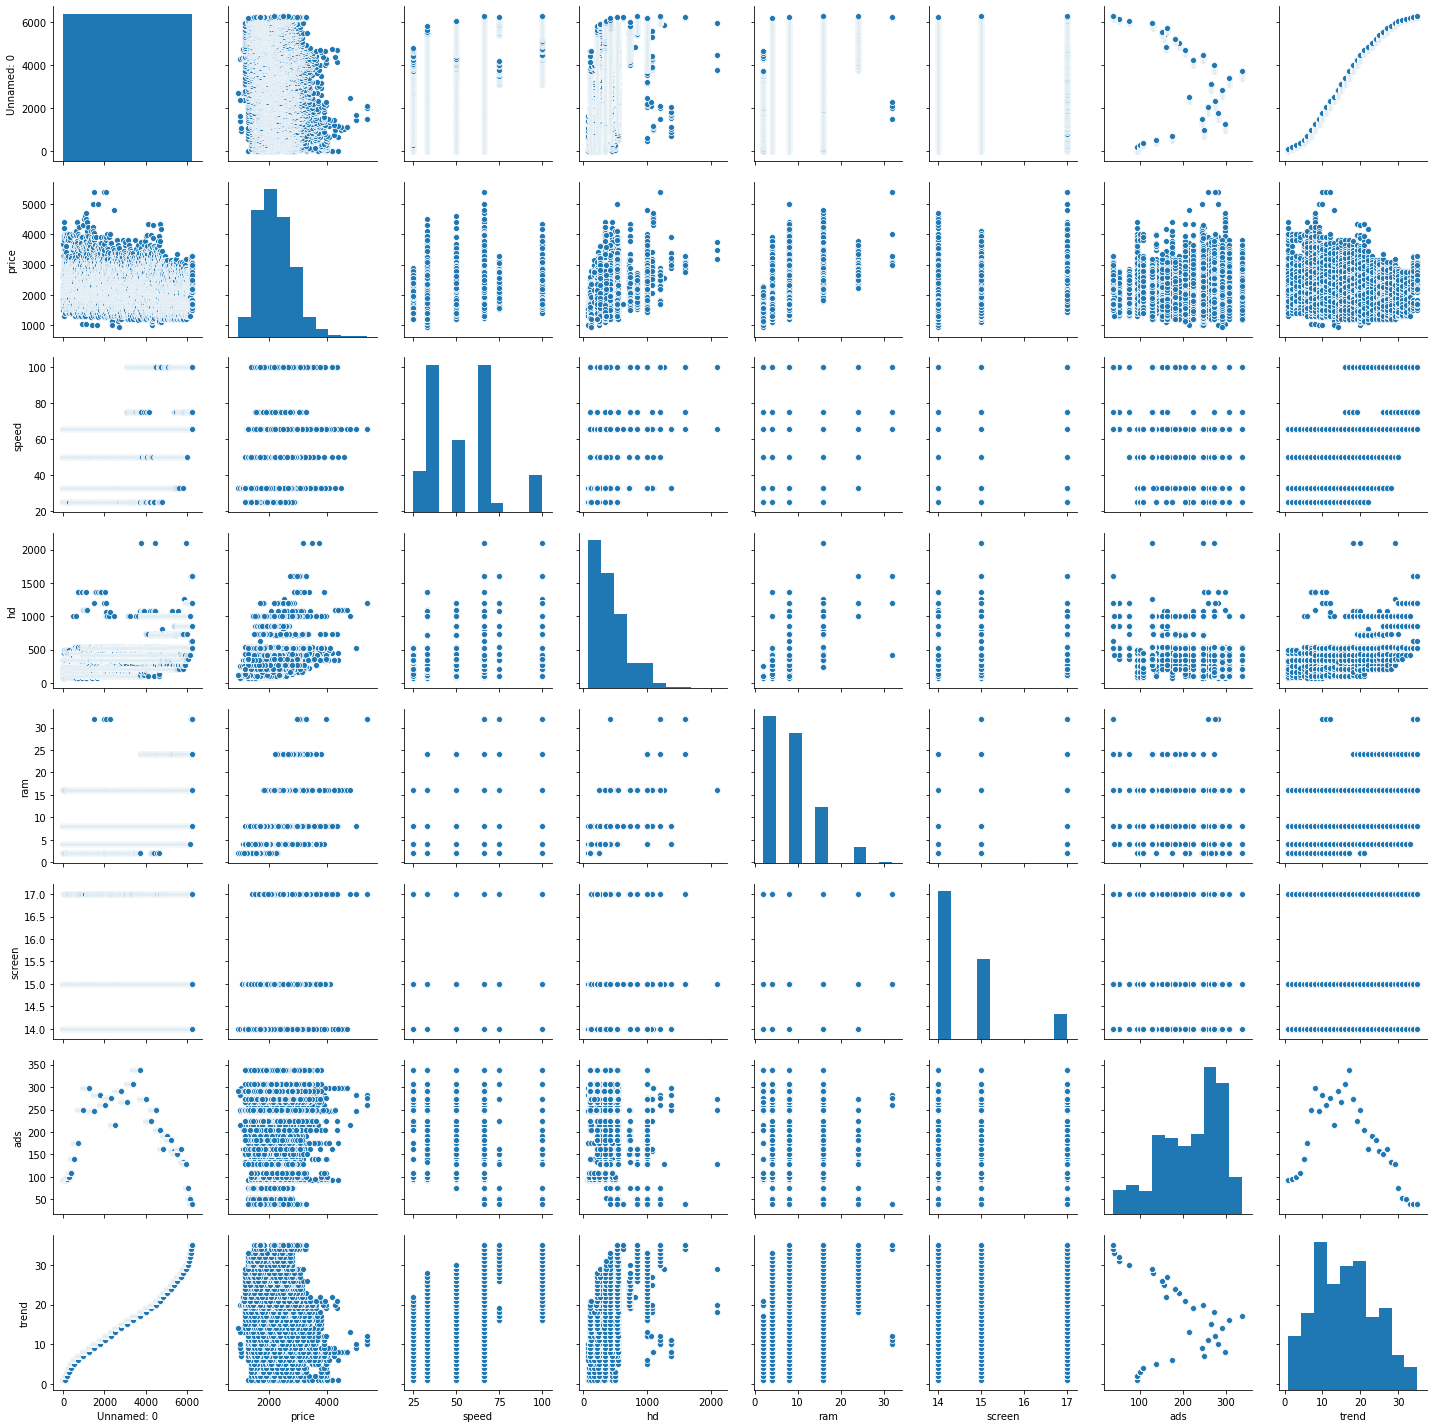

In [17]:
sns.pairplot(computer)

In [18]:
computer.columns

Index(['Unnamed: 0', 'price', 'speed', 'hd', 'ram', 'screen', 'cd', 'multi',
       'premium', 'ads', 'trend'],
      dtype='object')

In [19]:
import statsmodels.formula.api as smf

In [20]:
ml1 = smf.ols('price~speed+hd+ram+screen+ads+trend',data=computer).fit()

In [21]:
ml1.params

Intercept   -246.675468
speed          8.893913
hd             0.708823
ram           47.387036
screen       126.702402
ads            0.969689
trend        -47.081967
dtype: float64

In [22]:
ml1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.712
Model:                            OLS   Adj. R-squared:                  0.712
Method:                 Least Squares   F-statistic:                     2580.
Date:                Sat, 18 Jan 2020   Prob (F-statistic):               0.00
Time:                        19:46:41   Log-Likelihood:                -44817.
No. Observations:                6259   AIC:                         8.965e+04
Df Residuals:                    6252   BIC:                         8.969e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -246.6755     66.371     -3.717      0.000    -376.785    -116.566
speed          8.8939      0.209     42.590      0.000       8.485       9.303
hd             0.7088      0.031     22.932      0.000       0.648       0.769
ram           47.3870      1.188     39.899      0.000      45.059      49.715
screen       126.7024      4.521     28.022      0.000     117.839     135.566
ads            0.9697      0.057     17.099      0.000       0.859       1.081
trend        -47.0820      0.676    -69.660      0.000     -48.407     -45.757
==============================================================================
Omnibus:                     1407.073   Durbin-Watson:                   1.948
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3902.981
Skew:                           1.187   Prob(JB):                         0.00
Kurtosis:                       6.054   Cond. No.                     8.89e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.89e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [23]:
ml_v=smf.ols('price~speed',data = computer).fit()  

In [24]:
ml_v.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.091
Model:                            OLS   Adj. R-squared:                  0.090
Method:                 Least Squares   F-statistic:                     623.3
Date:                Sat, 18 Jan 2020   Prob (F-statistic):          3.23e-131
Time:                        19:46:42   Log-Likelihood:                -48418.
No. Observations:                6259   AIC:                         9.684e+04
Df Residuals:                    6257   BIC:                         9.685e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1789.8539     18.582     96.320      0.000    1753.426    1826.282
speed          8.2621      0.331     24.965      0.000       7.613       8.911
==============================================================================
Omnibus:                      507.676   Durbin-Watson:                   1.757
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              667.899
Skew:                           0.704   Prob(JB):                    9.28e-146
Kurtosis:                       3.760   Cond. No.                         149.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
ml_w=smf.ols('price~hd',data = computer).fit()

In [26]:
ml_w.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.185
Model:                            OLS   Adj. R-squared:                  0.185
Method:                 Least Squares   F-statistic:                     1421.
Date:                Sat, 18 Jan 2020   Prob (F-statistic):          1.67e-280
Time:                        19:46:42   Log-Likelihood:                -48075.
No. Observations:                6259   AIC:                         9.615e+04
Df Residuals:                    6257   BIC:                         9.617e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1816.9176     12.569    144.552      0.000    1792.277    1841.558
hd             0.9665      0.026     37.702      0.000       0.916       1.017
==============================================================================
Omnibus:                      541.884   Durbin-Watson:                   1.495
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              747.624
Skew:                           0.713   Prob(JB):                    4.52e-163
Kurtosis:                       3.913   Cond. No.                         930.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:
ml_x=smf.ols('price~ram',data = computer).fit()

In [28]:
ml_x.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.388
Model:                            OLS   Adj. R-squared:                  0.388
Method:                 Least Squares   F-statistic:                     3964.
Date:                Sat, 18 Jan 2020   Prob (F-statistic):               0.00
Time:                        19:46:42   Log-Likelihood:                -47180.
No. Observations:                6259   AIC:                         9.436e+04
Df Residuals:                    6257   BIC:                         9.438e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1687.2925     10.221    165.073      0.000    1667.255    1707.330
ram           64.2316      1.020     62.959      0.000      62.232      66.232
==============================================================================
Omnibus:                     1327.783   Durbin-Watson:                   1.533
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3113.140
Skew:                           1.188   Prob(JB):                         0.00
Kurtosis:                       5.508   Cond. No.                         17.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [29]:
ml_wv=smf.ols('price~speed+ram',data = computer).fit()  

In [30]:
ml_wv.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.413
Model:                            OLS   Adj. R-squared:                  0.413
Method:                 Least Squares   F-statistic:                     2202.
Date:                Sat, 18 Jan 2020   Prob (F-statistic):               0.00
Time:                        19:46:42   Log-Likelihood:                -47047.
No. Observations:                6259   AIC:                         9.410e+04
Df Residuals:                    6256   BIC:                         9.412e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1486.2835     15.800     94.066      0.000    1455.309    1517.258
speed          4.4967      0.274     16.441      0.000       3.961       5.033
ram           60.2652      1.028     58.643      0.000      58.251      62.280
==============================================================================
Omnibus:                     1220.874   Durbin-Watson:                   1.361
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2792.868
Skew:                           1.107   Prob(JB):                         0.00
Kurtosis:                       5.410   Cond. No.                         159.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [31]:
price_pred = ml1.predict(computer[['speed','hd','ram','screen','ads','trend']])

In [32]:
price_pred.head(3)

0    2039.828804
1    2019.750147
2    2230.325295
dtype: float64

In [33]:
rsq_speed = smf.ols('speed~hd+ram+screen+ads+trend',data=computer).fit().rsquared  

In [34]:
vif_speed = 1/(1-rsq_speed)

In [35]:
vif_speed

1.257595278566506

In [36]:
rsq_hd = smf.ols('hd~speed+ram+screen+ads+trend',data=computer).fit().rsquared  

In [37]:
vif_hd = 1/(1-rsq_hd)

In [38]:
vif_hd

4.114441163120936

In [39]:
rsq_ram = smf.ols('ram~speed+hd+screen+ads+trend',data=computer).fit().rsquared  

In [40]:
vif_ram = 1/(1-rsq_ram)

In [41]:
vif_ram 

2.8814231450591237

In [42]:
rsq_screen= smf.ols('screen~speed+hd+ram+ads+trend',data=computer).fit().rsquared  

In [43]:
vif_screen= 1/(1-rsq_screen)

In [44]:
vif_screen

1.0789293881863942

In [45]:
rsq_ads= smf.ols('ads~speed+hd+ram+screen+trend',data=computer).fit().rsquared  

In [46]:
vif_ads= 1/(1-rsq_ads)

In [47]:
vif_ads

1.1603365223193793

In [48]:
rsq_trend= smf.ols('trend~speed+hd+ram+screen+ads',data=computer).fit().rsquared  

In [49]:
vif_trend= 1/(1-rsq_trend)

In [50]:
vif_trend

1.8245417394913497

In [51]:
model2 = smf.ols('price~np.log(speed+hd+ram+screen+ads+trend)',data=computer).fit()

In [52]:
model2.params

Intercept                                         -2728.068695
np.log(speed + hd + ram + screen + ads + trend)     757.685336
dtype: float64

In [53]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.210
Model:                            OLS   Adj. R-squared:                  0.210
Method:                 Least Squares   F-statistic:                     1665.
Date:                Sat, 18 Jan 2020   Prob (F-statistic):          4.94e-323
Time:                        19:46:45   Log-Likelihood:                -47977.
No. Observations:                6259   AIC:                         9.596e+04
Df Residuals:                    6257   BIC:                         9.597e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================================================
                                                      coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------
Intercept                                       -2728.0687    121.414    -22.469      0.000   -2966.082   -2490.055
np.log(speed + hd + ram + screen + ads + trend)   757.6853     18.567     40.809      0.000     721.288     794.082
==============================================================================
Omnibus:                      608.900   Durbin-Watson:                   1.411
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              869.998
Skew:                           0.763   Prob(JB):                    1.21e-189
Kurtosis:                       4.002   Cond. No.                         125.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [54]:
print(model2.conf_int(0.01))

                                                           0            1
Intercept                                       -3040.906747 -2415.230643
np.log(speed + hd + ram + screen + ads + trend)   709.846360   805.524312


In [56]:
model3 = smf.ols('np.log(price)~speed+hd+ram+screen+ads+trend',data=computer).fit()

In [57]:
model3.params

Intercept    6.580766
speed        0.004085
hd           0.000315
ram          0.020939
screen       0.055647
ads          0.000432
trend       -0.021027
dtype: float64

In [58]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(price)   R-squared:                       0.716
Model:                            OLS   Adj. R-squared:                  0.716
Method:                 Least Squares   F-statistic:                     2632.
Date:                Sat, 18 Jan 2020   Prob (F-statistic):               0.00
Time:                        19:55:57   Log-Likelihood:                 3542.4
No. Observations:                6259   AIC:                            -7071.
Df Residuals:                    6252   BIC:                            -7024.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.5808      0.029    224.799      0.000       6.523       6.638
speed          0.0041   9.21e-05     44.355      0.000       0.004       0.004
hd             0.0003   1.36e-05     23.121      0.000       0.000       0.000
ram            0.0209      0.001     39.973      0.000       0.020       0.022
screen         0.0556      0.002     27.903      0.000       0.052       0.060
ads            0.0004    2.5e-05     17.277      0.000       0.000       0.000
trend         -0.0210      0.000    -70.534      0.000      -0.022      -0.020
==============================================================================
Omnibus:                      294.323   Durbin-Watson:                   1.958
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              522.031
Skew:                           0.374   Prob(JB):                    4.39e-114
Kurtosis:                       4.200   Cond. No.                     8.89e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.89e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""